In [1]:
import pandas as pd
import numpy as np
import os
from utils import utils
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def merge_base(path_clean):
    """
    Merges two datasets, cleans, and prepares the final DataFrame for analysis.

    Args:
    path_clean (str): Path to save the cleaned CSV file.

    Returns:
    pd.DataFrame: The cleaned and merged DataFrame.
    """
    
    # Load datasets from Excel files
    df_0 = pd.read_excel("Bases\\base2009_2018_Leonardo_Lopez.xlsx")
    df_1 = pd.read_excel("Bases\\base_2019_2022_Leonardo_Lopez_al_01_10_2023.xlsx")

    # Extract column names for both datasets
    a = df_0.columns
    b = df_1.columns

    # Fill NaN values in 'ID_DEPTO_INDEC_RESIDENCIA', convert to string, and retain last three characters
    df_1["ID_DEPTO_INDEC_RESIDENCIA"] = df_1["ID_DEPTO_INDEC_RESIDENCIA"].fillna(0).astype(int).astype(str).str[-3:]

    # Merge the two DataFrames, removing duplicates based on shared columns
    df_f_ = pd.concat([df_1, df_0]).drop_duplicates(set(a) & set(b), keep="first")
    df_f_ = df_f_.reset_index(drop=True).reset_index(names="ID")

    # Drop unnecessary columns that are not needed for analysis
    df_f_ = df_f_.drop(["GRUPEDAD", 'PROVINCIA_CARGA', "n", 'DEPTO_CARGA', "ESTAB_TTO", 'FECHA_COMORB'], axis=1)

    # Display the DataFrame to check the results
    display(df_f_)

    # Dictionary to rename columns for consistency and easier access
    dic_rename = {
        'PROVINCIA_RESIDENCIA': 'provincia',
        'ID_PROV_INDEC_RESIDENCIA': 'id_provincia',
        'DEPARTAMENTO_RESIDENCIA': "departamento",
        "ID_DEPTO_INDEC_RESIDENCIA": "id_departamento",
        "LOCALIDAD_RESIDENCIA": "localidad",
        "FECHA_NOTIFICACION": "fecha",
        "FECHA_INICIO_TRAT": "inicio_trat",
        "EDAD_DIAGNOSTICO": "edad",
    }

    # Rename columns and convert all column names to lowercase
    df_f_ = df_f_.rename(columns=dic_rename)
    df_f_.columns = [col.lower() for col in df_f_.columns]

    # Filter rows where 'fecha' is not null to ensure complete data
    df_f_0 = df_f_.loc[~df_f_["fecha"].isnull()]

    # Save the cleaned DataFrame to a CSV file
    df_f_0.to_csv(path_clean, index=False)
    
    return df_f_0


In [3]:
"""
This cell checks for the existence of a cleaned dataset.
If it exists, it loads the data; otherwise, it merges and cleans the base data.
It then formats, cleans, and replaces specific values for further analysis.
"""

path_clean = 'Bases\\Clean_Base.csv'

# Check if the cleaned CSV file exists
if os.path.exists(path_clean):
    df_base = pd.read_csv(path_clean)
else:
    df_base = merge_base(path_clean)

# Format 'id_departamento' to three digits
df_base["id_departamento"] = df_base["id_departamento"].apply(lambda x: utils.formatear_tres_digitos(x))

# Fill missing 'id_provincia' values and format to two digits
df_base['id_provincia'] = df_base['id_provincia'].fillna(0).apply(lambda x: utils.formatear_dos_digitos(x))

# Remove accents and clean text in specified columns
for s in ["provincia", "departamento", "localidad"]:
    df_base[s] = df_base[s].apply(utils.quitar_acentos_limpiar)

# Replace specified strings with NaN to handle missing data
for c in ["Sin información", '*Sin Dato* (*Sin Dato*)', "Desconocido", "Sin Información", "Sin informacion", "Nan"]:
    df_base = df_base.replace(c, np.nan)


In [17]:
"""
This cell processes the provinces dataset by formatting and combining province and department codes.
It loads the dataset, formats specific columns, and creates a new combined code column.
"""

df_provincias = pd.read_csv("Bases\\provincias_total.csv")

df_provincias2 = df_provincias.copy()

# Fill NaN values and format 'Codigo Provincia' to two digits
df_provincias2['Codigo Provincia'] = df_provincias2['Codigo Provincia'].fillna(0).apply(lambda x: utils.formatear_dos_digitos(x))

# Fill NaN values and format 'CodDepto' to three digits
df_provincias2['CodDepto'] = df_provincias2['CodDepto'].fillna(0).apply(lambda x: utils.formatear_tres_digitos(x))


df_provincias2["CodProvDepto2"] = df_provincias2['Codigo Provincia'] + df_provincias2['CodDepto']


,Departamento,Código,Localidad,CodEnt,Entidad comprendida,CodAglo,CodProv,CodDepto,CodLoc,Provincia,Codigo Provincia,CodProvDepto,ID_DEPTO_INDEC_RESIDENCIA,CodProvDepto2
0,Comuna 1,02001010,Ciudad de Buenos Aires,NaN,Ciudad de Buenos Aires,1.0,02,001,10.0,CABA,02,2001,1,02001
1,Comuna 2,02002010,Ciudad de Buenos Aires,NaN,Ciudad de Buenos Aires,1.0,02,002,10.0,CABA,02,2002,2,02002
2,Comuna 3,02003010,Ciudad de Buenos Aires,NaN,Ciudad de Buenos Aires,1.0,02,003,10.0,CABA,02,2003,3,02003
3,Comuna 4,02004010,Ciudad de Buenos Aires,NaN,Ciudad de Buenos Aires,1.0,02,004,10.0,CABA,02,2004,4,02004
4,Comuna 5,02005010,Ciudad de Buenos Aires,NaN,Ciudad de Buenos Aires,1.0,02,005,10.0,CABA,02,2005,5,02005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,NaN,NaN,Tolhuin,NaN,Tolhuin,NaN,NaN,000,NaN,Tierra del Fuego,94,94000,0,94000
4140,Ushuaia,94014010,Laguna Escondida,NaN,Laguna Escondida,7101.0,94.0,014,10.0,Tierra del Fuego,94,94014,14,94014
4141,Ushuaia,94014020,Ushuaia,NaN,Ushuaia,86.0,94.0,014,20.0,Tierra del Fuego,94,94014,14,94014
4142,Islas del Atlantico Sur,94021000,Sin Localidades,NaN,Sin Localidades,0.0,94.0,021,0.0,Tierra del Fuego,94,94021,21,94021


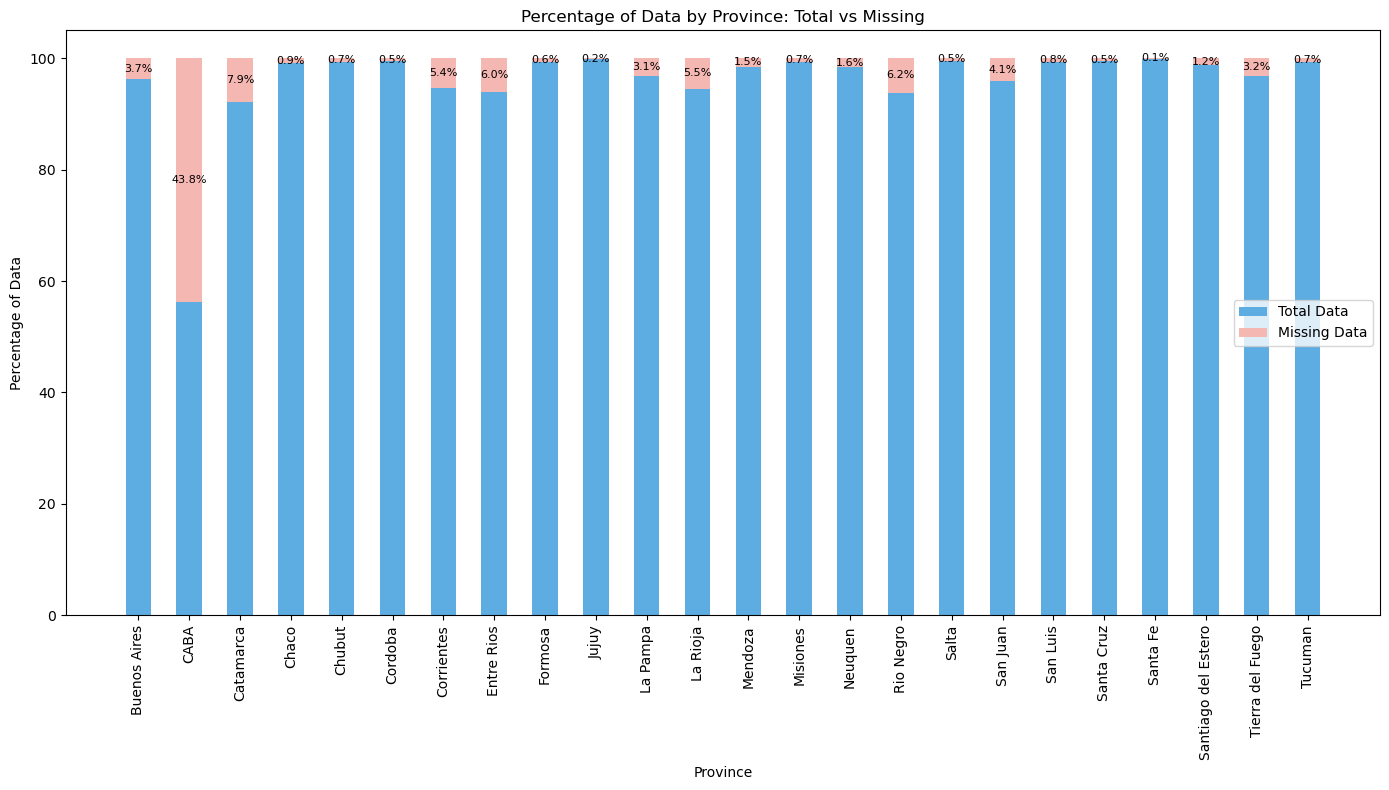

In [46]:
"""
This cell processes and compares the base dataset with a list of valid province and department codes.
It calculates the percentage of missing data by province and visualizes the results.
"""


df_base_caba = df_base.copy()
l_codprov = list(df_provincias2["CodProvDepto2"])

df_base_caba['id_departamento'] = df_base_caba['id_departamento'].fillna("").str.replace("658", "058")
df_base_caba['CodProvDepto'] = df_base_caba['id_provincia'].astype(str) + df_base_caba['id_departamento'].astype(str)

df_correcto = df_base_caba[~df_base_caba['CodProvDepto'].isin(l_codprov)]

groupby_correcto = df_correcto.groupby(["provincia"]).size().reset_index(name='count_correcto')
groupby_base_caba = df_base_caba.groupby(["provincia"]).size().reset_index(name='count_base_caba')

result = pd.merge(groupby_correcto, groupby_base_caba, on='provincia', how='outer').fillna(0)
result['percentage_correcto'] = result['count_correcto'] / result['count_base_caba'] * 100
result['percentage_correcto'] = result['percentage_correcto'].fillna(0)
result['percentage_base_caba'] = 100 - result['percentage_correcto']

result = result.loc[result["provincia"] != "Desconocida"]


fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.5
index = result['provincia']

bar1 = ax.bar(index, result['percentage_base_caba'], bar_width, label='Total Data', color='#5DADE2')
bar2 = ax.bar(index, result['percentage_correcto'], bar_width, bottom=result['percentage_base_caba'], label='Missing Data', color='#F5B7B1')

# Annotate bars with percentage of missing data
for i in range(len(result)):
    ax.text(i, result['percentage_base_caba'].iloc[i] + result['percentage_correcto'].iloc[i] / 2, 
            f'{result["percentage_correcto"].iloc[i]:.1f}%', ha='center', va='center', color='black', fontsize=8)

ax.set_xlabel('Province')
ax.set_ylabel('Percentage of Data')
ax.set_title('Percentage of Data by Province: Total vs Missing')
ax.legend(loc='right')
plt.xticks(rotation=90)
plt.tight_layout()


plt.savefig('Documentacion\\figures\\missing_dept_caba.png', dpi=300)
plt.show()


In [16]:
def fill_caba(df_base):
    """
    Fills missing 'departamento' values for CABA using the distribution of known departments.

    Args:
    df_base (pd.DataFrame): DataFrame containing the base data.

    Returns:
    pd.DataFrame: Updated DataFrame with filled 'departamento' values.
    """
    
    df_base.loc[(df_base["provincia"] == 'CABA') & (df_base['departamento'].isnull()), 'departamento'] = "DESCONOCIDO"
    caba_desconocido = df_base[(df_base["provincia"] == 'CABA') & (df_base['departamento'] == 'DESCONOCIDO')].reset_index(drop=True)
    distribucion_departamento = df_base[(df_base["provincia"] == 'CABA') & (df_base['departamento'] != 'DESCONOCIDO')].groupby(["provincia", 'fnyear'])['departamento'].value_counts(normalize=True)

    nuevos_valores = []
    for _, row in caba_desconocido.iterrows():
        year = row['fnyear']
        distribucion_anio = distribucion_departamento['CABA', year]
        nuevos_valores.append(np.random.choice(distribucion_anio.index, p=distribucion_anio.values))

    caba_desconocido['departamento'] = nuevos_valores

    df_base = df_base.loc[~df_base["id"].isin(caba_desconocido["id"])]
    df_base = pd.concat([df_base, caba_desconocido])

    return df_base

def fill_caba2(df_base):
    """
    Fills and corrects 'id_departamento' for CABA based on 'departamento' names.

    Args:
    df_base (pd.DataFrame): DataFrame containing the base data.

    Returns:
    pd.DataFrame: Updated DataFrame with corrected 'id_departamento' values.
    """
    
    df_base['link'] = df_base['id_provincia'].astype(str) + df_base['id_departamento'].astype(str)
    numeric_mask = df_base['link'].astype(str).str.match(r'^-?\d+(\.\d+)?$')

    df_base.loc[df_base["provincia"] == "CABA", 'departamento'] = df_base.loc[df_base["provincia"] == "CABA", 'departamento'].str.title()
    df_correcto = df_base[(numeric_mask) & (df_base["provincia"] == "CABA")][["departamento", "id_departamento"]].drop_duplicates()

    for s in df_correcto.index:
        depto = df_correcto.loc[s, "departamento"]
        cod = df_correcto.loc[s, "id_departamento"]

        df_base.loc[(~numeric_mask) & (df_base["provincia"] == "CABA") & (df_base["departamento"] == depto), "id_departamento"] = cod
        df_base.loc[(~numeric_mask) & (df_base["provincia"] == "CABA") & (df_base["departamento"] == depto), "link"] = "02" + cod

    total_cambiar = df_base.loc[(df_base["provincia"] == "CABA") & ((df_base["departamento"] == "Capital Federal") | (df_base["departamento"] == "Nan") | (df_base["id_departamento"] == "000"))]

    df_dist = pd.DataFrame(pd.pivot_table(df_base.loc[(df_base["provincia"] == "CABA") & (df_base["departamento"] != "Capital Federal") & (df_base["departamento"] != "Nan")],
                                          index="departamento", values="id", aggfunc="count").to_records())
    df_dist["id"] = df_dist["id"] / df_dist["id"].sum()
    df_dist = pd.merge(df_dist, df_correcto, on="departamento", how="left")

    import random
    random.seed(42)
    id_cambiar = list(total_cambiar["id"])
    random.shuffle(id_cambiar)

    df_dist["cambiar"] = (df_dist["id"] * len(total_cambiar)).round(0)
    n_ant = 0
    for i in df_dist.index:
        n = int(df_dist.iloc[i]['cambiar'])
        l_cambiar = id_cambiar[n_ant:n_ant+n]

        depto_c = df_dist.iloc[i]['departamento']
        id_depto = df_dist.iloc[i]['id_departamento']
        df_base.loc[df_base["id"].isin(l_cambiar), "departamento"] = depto_c
        df_base.loc[df_base["id"].isin(l_cambiar), "id_departamento"] = id_depto
        df_base.loc[df_base["id"].isin(l_cambiar), "link"] = "02" + id_depto
        n_ant = n_ant + n

    return df_base

# Apply functions to fill and correct 'departamento' and 'id_departamento' for CABA
df_base = fill_caba(df_base)
df_base = fill_caba2(df_base)


['Nan' 'Capital Federal']


In [17]:
def checking_dept(df_base):
    """
    Checks and processes department codes in the DataFrame.

    Args:
    df_base (pd.DataFrame): DataFrame containing the base data.

    Returns:
    pd.DataFrame: Updated DataFrame with valid department codes.
    """
    
    # Create 'CodProvDepto' by combining province and department IDs
    df_base["CodProvDepto"] = df_base["id_provincia"].astype(str) + df_base['id_departamento'].astype(str)
    df_base.loc[df_base["provincia"] == "CABA", "departamento"] = df_base.loc[df_base["provincia"] == "CABA", "departamento"].str.title()
    df_provincias["CodProvDepto"] = df_provincias["CodProvDepto"].astype(str)
    
    # Filter out rows with null or unknown 'departamento' and 'localidad'
    df_base = df_base.loc[~(((df_base['departamento'].isnull()) | (df_base['departamento'] == "DESCONOCIDO") | (df_base['departamento'] == "NA")) 
                            & (df_base["localidad"].isnull()))]
    
    numeric_mask = df_base['link'].astype(str).str.match(r'^-?\d+(\.\d+)?$')
    print(len(df_base.loc[df_base["provincia"] == "CABA"]))

    # Filter DataFrame with numeric mask
    df_base = df_base[numeric_mask]
    print(len(df_base.loc[df_base["provincia"] == "CABA"]))
    
    # Merge with province data to validate department codes
    df_base = pd.merge(df_base, df_provincias[["CodProvDepto", "CodDepto"]].drop_duplicates(), on=["CodProvDepto"], how="left")
    print(len(df_base.loc[df_base["provincia"] == "CABA"]))

    # Remove rows with invalid department codes
    df_base = df_base.loc[(df_base['id_departamento'] != "000") & (df_base['id_departamento'] != "999")]
    print(len(df_base.loc[df_base["provincia"] == "CABA"]))

    df_base = df_base.loc[df_base["provincia"] != "Desconocida"]
    
    return df_base

# Apply the department checking function
df_base = checking_dept(df_base)


16213
16213
16213
16211


In [19]:

def add_population(df_base, df_final_pob):
    """
    Adds population and health data to the base DataFrame and estimates population and density growth.

    Args:
    df_base (pd.DataFrame): DataFrame containing the base data.
    df_final_pob (pd.DataFrame): DataFrame containing population data.

    Returns:
    pd.DataFrame: Updated DataFrame with added and estimated population and health data.
    """

    # Load population data
    df_final_pob = pd.read_csv("Bases\\poblacion_arg.csv")

    # Merge population data with the base DataFrame
    df_base = pd.merge(df_base, df_final_pob, on="provincia", how="left")

    # Handle missing or invalid 'edad' values
    df_base.loc[(df_base['edad'].isnull()) | (df_base['edad'] == ""), 'edad'] = np.nan

    # Assign health level based on age groups
    df_base["salud"] = df_base["salud_65_2022"]
    df_base.loc[df_base['edad'] < 65, "salud"] = df_base["salud_64_2022"]
    df_base.loc[df_base['edad'] < 18, "salud"] = df_base["salud_17_2022"]
    df_base.loc[(df_base['edad'].isnull()) | (df_base['edad'] < 0), "salud"] = np.nan

    # Drop unnecessary health columns
    df_base.drop(["salud_17_2022", "salud_64_2022", "salud_65_2022"], axis=1, inplace=True)

    # Calculate days between census dates
    dias = (pd.to_datetime("2022-05-18") - pd.to_datetime("2010-10-27")).days

    # Calculate the number of days from the last census to the event date
    df_base["Total_Dias"] = (pd.to_datetime(df_base['fecha']) - pd.to_datetime("2010-10-27")).dt.days

    # Estimate population and density growth per day
    df_base["Crecimiento_Pob"] = (df_base["poblacion_2022"] - df_base["poblacion_2010"]) / dias
    df_base["Densidad_Pob"] = (df_base["densidad_2022"] - df_base["densidad_2010"]) / dias

    # Estimate current population and density based on growth rates
    df_base["poblacion_estimada"] = (df_base["Crecimiento_Pob"] * df_base["Total_Dias"]) + df_base["poblacion_2010"]
    df_base["densidad_estimada"] = (df_base["Densidad_Pob"] * df_base["Total_Dias"]) + df_base["densidad_2010"]

    # Drop columns that are no longer needed
    df_base.drop(["poblacion_2010", "poblacion_2022", "Total_Dias", "Crecimiento_Pob", "densidad_2022", "densidad_2010", "Densidad_Pob"], axis=1, inplace=True)

    return df_base

# Load population data
df_final_pob = utils.poblacion_arg()
df_final_pob = pd.read_csv("Bases\\poblacion_arg.csv")

# Apply the function to add population and health data to the base DataFrame
df_base = add_population(df_base, df_final_pob)



16211


,provincia,densidad_2010,densidad_2022,poblacion_2010,poblacion_2022,salud_17_2022,salud_64_2022,salud_65_2022,Provincia
0,CABA,14450.8,15161.3,2890151,3121707,80.1,81.1,96.8,NaN
1,Neuquen,5.9,7.5,551266,710814,66.4,65.7,93.7,NaN
2,San Luis,5.6,7.2,432310,542069,59.2,59.1,96.1,NaN
3,Santa Fe,24.0,26.6,3194537,3544908,60.9,67.0,97.2,NaN
4,La Rioja,3.7,4.2,333642,383865,52.7,55.8,94.7,NaN
5,Catamarca,3.6,4.2,367828,429562,54.9,55.5,95.3,NaN
6,Tucuman,64.3,76.7,1448188,1731820,59.7,63.1,95.5,NaN
7,Chaco,10.6,11.3,1055259,1129606,38.1,46.0,92.5,NaN
8,Formosa,7.4,8.0,530162,607419,34.4,42.3,88.1,NaN
9,Santa Cruz,1.1,1.4,273964,337226,86.4,79.8,97.2,NaN


16211


In [20]:
def complete_variables(df_base):
    """
    Completes and updates various variables in the DataFrame based on specific conditions.

    Args:
    df_base (pd.DataFrame): DataFrame containing the base data.

    Returns:
    pd.DataFrame: Updated DataFrame with completed variables.
    """
    
    # Replace "No realizado" in "resultado_hiv" with NaN
    df_base.loc[df_base["resultado_hiv"] == "No realizado", "resultado_hiv"] = np.nan

    # Update "vih" based on conditions
    mask1 = (df_base["vih"].isnull()) & (~df_base["resultado_hiv"].isnull()) & (df_base["resultado_hiv"] != df_base["vih"])
    df_base.loc[mask1, "vih"] = df_base.loc[mask1, "resultado_hiv"]

    mask2 = (~df_base["vih"].isnull()) & (df_base["resultado_hiv"].isnull()) & (df_base["resultado_hiv"] != df_base["vih"])
    df_base.loc[mask2, "resultado_hiv"] = df_base.loc[mask2, "vih"]

    df_base.loc[(df_base["vih"].isnull()) & (~df_base["resultado_hiv"].isnull()), "vih"] = "Negativo"
    df_base.loc[(~df_base["vih"].isnull()) & (df_base["resultado_hiv"].isnull()), "prueba_vih"] = "Si"

    # Update various columns based on "fnyear"
    cols_to_update = ["alcoholismo", "tabaquismo", "etnia", "consumo_prob_drogas", "resistencia"]
    for col in cols_to_update:
        df_base.loc[(df_base[col].isnull()) & (df_base['fnyear'].fillna(0).astype(int) >= 2019), col] = "NO"

    # Update "enfermedad respiratoria"
    df_base.loc[(~df_base["covid"].isnull()) & (~df_base['enf_resp_cronica'].isnull()), "enfermedad respiratoria"] = "SI"
    df_base.loc[(df_base["enfermedad respiratoria"].isnull()) & (df_base['fnyear'].fillna(0).astype(int) >= 2019), "enfermedad respiratoria"] = "NO"

    # Replace values in "resultado_tratamiento" using a dictionary
    resultados_tratamiento_dict = {
        'Pérdida de seguimiento': "Sin Información",
        'Traslado': "Sin Información",
        'En tratamiento': "Sin Información",
        'nan': "Sin Información",
        'Fallecido': 'Fracaso',
        'Fracaso del tratamiento': 'Fracaso',
        'Tratamiento completo': "Éxito",
        'Curado': "Éxito",
    }
    for key, value in resultados_tratamiento_dict.items():
        df_base["resultado_tratamiento"] = df_base["resultado_tratamiento"].astype(str).str.replace(key, value)

    df_base.loc[df_base["resultado_tratamiento"].isnull(), "resultado_tratamiento"] = 'Sin Información'
    df_base.loc[~df_base["sexo"].astype(str).isin(["M", "F"]), "sexo"] = 'Sin Información'
    df_base.loc[df_base["embarazo"] == "NS", "embarazo"] = 'Sin Información'

    # Additional updates
    df_base.loc[df_base["resistencia"] == "Resistencia indeterminada", "resistencia"] = "Resistencia no detectada"
    df_base.loc[df_base["resistencia"] == "Sin Información", "tipo_resistencia"] = "Sin Información"

    df_base.loc[(df_base["consumo_prob_drogas"] == "Sin Información") & (df_base["droga"] != "Sin Información"), "consumo_prob_drogas"] = "SI"

    df_base.loc[df_base["etnia"] == "No Declarado", "etnia"] = "NO"
    df_base.loc[((df_base["etnia"] != "NO") & (~df_base["etnia"].isnull())), "etnia"] = "SI"

    df_base.loc[df_base["embarazo"] == "NO", "embarazo_y_o_puerperio"] = "NO"
    df_base.loc[df_base["embarazo"] == "SI", "embarazo_y_o_puerperio"] = "NO"
    df_base.loc[df_base["sexo"] == "M", "embarazo_y_o_puerperio"] = "NO"

    # Drop unnecessary columns
    cols_to_drop = ["vih", "prueba_vih", "prueba_resistencia", "tipo_resistencia", "droga", "embarazo", "covid", 'enf_resp_cronica']
    df_base.drop(cols_to_drop, axis=1, inplace=True)

    return df_base

# Apply the function to complete variables in the DataFrame
df_base = complete_variables(df_base)


151010

In [39]:
from utils import utils

# Load obesity data
obesity_df = utils.obesity_data()
obesity_df = pd.read_csv("Bases\\obesity_data.csv")

import pyreadstat

# Load CONICET data
path_name = 'Bases\\Conicet\\CONICET_Digital_Nro.faadb325-d9c6-4df6-b361-99befc65e702_A.dta'
df2_ob, _ = pyreadstat.read_dta(path_name)

# Keep only relevant columns
for c in df2_ob.columns:
    if ("AdjOb_" in c and "SEA" not in c) or c == "cod_prov" or c == "pcia":
        pass
    else:
        df2_ob.drop(c, axis=1, inplace=True)

# Separate data for males and females
df2_ob_m = df2_ob[['cod_prov', 'pcia', 'AdjOb_Masc05', 'AdjOb_Masc09', 'AdjOb_Masc13', 'AdjOb_Masc18']]
df2_ob_f = df2_ob[['cod_prov', 'pcia', 'AdjOb_Fem05', 'AdjOb_Fem09', 'AdjOb_Fem13', 'AdjOb_Fem18']]

# Ensure 'fnyear' is treated as a string
df_base["fnyear"] = df_base["fnyear"].astype(str)
obesity_df["fnyear"] = obesity_df["fnyear"].astype(str)

# Filter out rows with null values in 'sexo', 'edad', or 'fecha'
df_base = df_base.loc[(~df_base["sexo"].isnull()) & (~df_base["edad"].isnull()) & (~df_base["fecha"].isnull())]

# Create 'cod_prov' as a string from 'id_provincia'
df_base["cod_prov"] = df_base["id_provincia"].astype(int).astype(str)
obesity_df["cod_prov"] = obesity_df["cod_prov"].astype(int).astype(str)

# Merge base DataFrame with obesity data
df_base = pd.merge(df_base, obesity_df, on=["cod_prov", "fnyear", "sexo"], how="left")

# Filter out rows where 'index obesity' is null
df_base = df_base.loc[~df_base["index obesity"].isnull()]


,cod_prov,pcia,AdjOb_Masc05,AdjOb_Masc09,AdjOb_Masc13,AdjOb_Masc18
0,2,CABA,11.482104,17.238947,18.623478,18.607349
1,6,Buenos Aires,14.096374,19.150164,23.949387,26.067015
2,10,Catamarca,17.317291,26.462194,23.572117,31.358749
3,14,Cordoba,15.425344,16.619766,24.478018,22.027395
4,18,Corrientes,18.027157,18.813486,21.112867,20.382980
5,22,Chaco,15.957518,19.830389,22.034204,17.097075
6,26,Chubut,17.264229,26.081232,27.688629,27.150587
7,30,Entre Rios,14.831649,16.436436,17.961681,21.227011
8,34,Formosa,15.645806,21.947016,19.620794,30.524853
9,38,Jujuy,17.040607,17.088581,22.768970,31.229506


In [24]:
# Load poverty data and filter necessary columns
df_pobreza = utils.crear_pobreza(df_provincias)
var_pob = [
    'Nivel de incidencia de pobreza crónica',
    '% de hogares con hacinamiento crítico',
    '% de hogares en vivienda deficitaria',
    '% de hogares sin acceso a red cloacal',
    '% de población en situación de pobreza crónica',
    '% de población sin obra social ni prepaga'
]
df_pobreza = df_pobreza[var_pob + ["link"]]

# Remove rows with null 'Nivel de incidencia de pobreza crónica'
df_pobreza = df_pobreza.loc[~df_pobreza["Nivel de incidencia de pobreza crónica"].isnull()]

# Dictionary to map poverty levels to numeric values
dic_ = {
    'Muy bajo (0 - 0.99%)': 0,
    'Bajo (1 - 4.99%)': 1,
    'Moderado (5 - 9.99%)': 2,
    'Alto (10 - 14.99%)': 3,
    'Muy alto (15 - 24.99%)': 4,
    'Crítico (25 - 100%)': 5
}

# Replace descriptive levels with numeric values
for d in dic_:
    df_pobreza["Nivel de incidencia de pobreza crónica"] = df_pobreza["Nivel de incidencia de pobreza crónica"].str.replace(d, str(dic_[d]))

# Merge poverty data with the base DataFrame
df_base = pd.merge(df_base, df_pobreza, on="link", how="left")

# Filter out rows with null values in '% de hogares en vivienda deficitaria'
df_base = df_base.loc[~df_base["% de hogares en vivienda deficitaria"].isnull()]

# Convert 'Nivel de incidencia de pobreza crónica' to integer
df_base["Nivel de incidencia de pobreza crónica"] = df_base["Nivel de incidencia de pobreza crónica"].astype(int)


In [25]:
import geopandas as gpd
from shapely.geometry import Point
from scipy.spatial import cKDTree
import pandas as pd
import numpy as np
from datetime import datetime
# 

In [28]:
# df_clima=pd.read_csv("Bases\\Climatologicas_Argentina\\Datos_Clima_Arg.csv")


# df_estaciones=pd.read_csv("Bases\\Estaciones_clima.csv")

# df_clima["NOMBRE"]=df_clima["NOMBRE"].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# df_clima["NOMBRE"]=df_clima["NOMBRE"].str.replace("*","")
# df_clima2=pd.merge(df_estaciones,df_clima,on="NOMBRE",how="left")

# df_clima2.to_csv("Bases\\Clima_Final.csv",index=False)

In [31]:
def fill_climage(df_base2, df_f_pre, var_name):
    """
    Fills missing climate data in the DataFrame by generating synthetic data based on monthly statistics.

    Args:
    df_base2 (pd.DataFrame): DataFrame containing the base data with dates and provinces.
    df_f_pre (pd.DataFrame): DataFrame where the climate data needs to be filled.
    var_name (str): The name of the climate variable to be filled.

    Returns:
    pd.DataFrame: Updated DataFrame with filled climate data.
    """
    
    df_f_0 = df_base2.copy()
    df_f_0['fecha'] = pd.to_datetime(df_f_0['fecha'])
    df_f_0['FNmonth'] = df_f_0['fecha'].dt.month

    # Group by month, date, and province to get daily average temperature
    daily_temp = df_f_0.groupby(['FNmonth', 'fecha', 'provincia'])[var_name].mean().reset_index(name='daily_temp')

    # Group by month and province to get average temperature and std of daily temperatures
    monthly_temp_stats = daily_temp.groupby(['FNmonth', 'provincia']).agg(
        average_temp=('daily_temp', 'mean'),
        std_temp=('daily_temp', 'std')
    ).reset_index()

    # Generate missing dates from 2009-01-01 to 2017-11-25 for each province
    provinces = df_f_0['provincia'].unique()
    missing_dates = pd.date_range(start='2009-01-01', end='2017-11-25', freq='D')
    missing_data = pd.MultiIndex.from_product([missing_dates, provinces], names=['fecha', 'provincia']).to_frame(index=False)
    missing_data['FNmonth'] = missing_data['fecha'].dt.month

    # Merge to get the mean and std for each missing date and province
    missing_data = missing_data.merge(monthly_temp_stats, on=['FNmonth', 'provincia'], how='left')

    np.random.seed(42)  # Set random state for reproducibility

    # Generate synthetic data using normal distribution
    missing_data[var_name] = missing_data.apply(
        lambda row: np.random.normal(loc=row['average_temp'], scale=row['std_temp']) if pd.notnull(row['average_temp']) and pd.notnull(row['std_temp']) else np.nan,
        axis=1
    )

    df_missing = missing_data[["fecha", "provincia", var_name]]
    df_missing["fecha"] = df_missing["fecha"].astype(str)
    df_f_pre["fecha"] = df_f_pre["fecha"].astype(str)

    # Merge synthetic data with the existing DataFrame
    df_f_pre.drop([var_name], axis=1, inplace=True)
    df_f_pre = pd.merge(df_f_pre, df_missing, on=["fecha", "provincia"], how="left")

    return df_f_pre


In [32]:
# Load and preprocess climate data
df_clima = pd.read_csv("Bases\\Clima_Final.csv")
df_clima2 = df_clima.copy()

# Standardize province names and clean accents
df_clima2["provincia"] = df_clima2["provincia"].str.title().str.replace("Tierra Del Fuego", "Tierra del Fuego").str.replace("Santiago Del Estero", "Santiago del Estero").str.replace("Capital Federal", "CABA")
df_clima2["provincia"] = df_clima2["provincia"].apply(utils.quitar_acentos_limpiar)

# Filter out rows with null dates and rename date column
df_clima2 = df_clima2.loc[~df_clima2["FECHA"].isnull()]
df_clima2["FECHA"] = df_clima2["FECHA"].astype(str)
df_clima2 = df_clima2.rename(columns={'FECHA': 'fecha'})

# Pivot table to get mean values for climate variables
df_clima3 = pd.DataFrame(pd.pivot_table(df_clima2, index=["provincia", 'fecha'], values=["DD", "FF", "HUM", "PNM", "TEMP"], aggfunc="mean").to_records())

# Ensure 'fecha' is treated as a string in the base DataFrame
df_base["fecha"] = df_base["fecha"].astype(str)

# Merge base data with climate data
df_f = pd.merge(df_base, df_clima3, on=["provincia", 'fecha'], how="left")
df_f = df_f[df_f["fecha"] > "2017-11-26"]

# Sort the DataFrame by province and date
df_f = df_f.sort_values(by=["provincia", "fecha"])

# Forward fill missing climate values
col_values = ["TEMP", "HUM", "PNM", "DD", "FF"]
for c in col_values:
    df_f[c] = df_f[c].fillna(method="ffill")

# Combine filled climate data with the original base data
df_base = pd.concat([df_f, df_base]).drop_duplicates(subset="id", keep="first")

# Split data into pre and post cutoff dates
df_f_pre = df_base[pd.to_datetime(df_base["fecha"]) <= pd.to_datetime('2017-11-25')]
df_f_post = df_base[pd.to_datetime(df_base["fecha"]) > pd.to_datetime('2017-11-25')]

# Fill missing climate data for pre cutoff dates
for v in ["DD", "FF", "PNM", "TEMP", "HUM"]:
    df_f_pre = fill_climage(df_base, df_f_pre, v)

# Combine pre and post data and filter out rows with missing temperature values
df_base2 = pd.concat([df_f_pre, df_f_post])
df_base2 = df_base2[~df_base2["TEMP"].isnull()]  # 4 values


In [35]:
# Drop unnecessary columns
df_base2 = df_base2.drop(["pcia", "CodProvDepto", 'CodDepto', "Provincia"], axis=1)

# Replace 'Sin Información' with NaN
df_base2.replace('Sin Información', np.nan, inplace=True)

# Save the cleaned DataFrame to a CSV file
df_base2.to_csv("Bases//Base_Limpia_Added.csv", index=False)
